# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

635

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
import math
call_limit = 50
sets = math.ceil(len(cities)/call_limit)
print(sets)
13

# Split up cities array into roughly equal-sized sets under 50 entries each.
city_sets = np.array_split(cities, sets)
len(city_sets)
len(city_sets[0])

# start API calls

url = "http://api.openweathermap.org/data/2.5/weather"

params = {
    "appid": weather_api_key,
    "units": "Imperial"
}

# Collect list of JSON objects. According to Stack Overflow comments, not a good idea to append directly to DataFrame.
response_list = []

print("Beginning Data Retrieval")     
print("-----------------------------")

# iterate through list of cities, only append cities with an entry on OpenWeatherMap.
for set_index, city_set in enumerate(city_sets):
    for city_index, city_set in enumerate(city_sets[set_index]):
        print(f"Processing Record {city_index} of Set {set_index} | {city_sets[set_index][city_index]}")
        params['q'] = city_sets[set_index][city_index]    
        
        response = requests.get(url, params=params)
        print(response.url)
        
        response_json = response.json()
        
        # Check that city has entry on OpenWeatherMap.
        if response_json['cod'] == 200:
            response_list.append(response_json)
        else:
            if response_json['cod'] == 404:
                print("City not found. Skipping...")
#     break
    time.sleep(10)
print("-----------------------------")
print("Data Retrieval Complete")      
print("-----------------------------")


13
Beginning Data Retrieval
-----------------------------
Processing Record 0 of Set 0 | geraldton
http://api.openweathermap.org/data/2.5/weather?appid=17350b4c47ebb494915675f8f5de246b&units=Imperial&q=geraldton
Processing Record 1 of Set 0 | udachnyy
http://api.openweathermap.org/data/2.5/weather?appid=17350b4c47ebb494915675f8f5de246b&units=Imperial&q=udachnyy
Processing Record 2 of Set 0 | mys shmidta
http://api.openweathermap.org/data/2.5/weather?appid=17350b4c47ebb494915675f8f5de246b&units=Imperial&q=mys+shmidta
Processing Record 3 of Set 0 | imbituba
http://api.openweathermap.org/data/2.5/weather?appid=17350b4c47ebb494915675f8f5de246b&units=Imperial&q=imbituba
Processing Record 4 of Set 0 | busselton
http://api.openweathermap.org/data/2.5/weather?appid=17350b4c47ebb494915675f8f5de246b&units=Imperial&q=busselton
Processing Record 5 of Set 0 | pokosnoye
http://api.openweathermap.org/data/2.5/weather?appid=17350b4c47ebb494915675f8f5de246b&units=Imperial&q=pokosnoye
Processing Record 

http://api.openweathermap.org/data/2.5/weather?appid=17350b4c47ebb494915675f8f5de246b&units=Imperial&q=gat
Processing Record 5 of Set 1 | belushya guba
http://api.openweathermap.org/data/2.5/weather?appid=17350b4c47ebb494915675f8f5de246b&units=Imperial&q=belushya+guba
Processing Record 6 of Set 1 | tuktoyaktuk
http://api.openweathermap.org/data/2.5/weather?appid=17350b4c47ebb494915675f8f5de246b&units=Imperial&q=tuktoyaktuk
Processing Record 7 of Set 1 | dikson
http://api.openweathermap.org/data/2.5/weather?appid=17350b4c47ebb494915675f8f5de246b&units=Imperial&q=dikson
Processing Record 8 of Set 1 | tasiilaq
http://api.openweathermap.org/data/2.5/weather?appid=17350b4c47ebb494915675f8f5de246b&units=Imperial&q=tasiilaq
Processing Record 9 of Set 1 | scalloway
http://api.openweathermap.org/data/2.5/weather?appid=17350b4c47ebb494915675f8f5de246b&units=Imperial&q=scalloway
Processing Record 10 of Set 1 | saldanha
http://api.openweathermap.org/data/2.5/weather?appid=17350b4c47ebb494915675f8f

http://api.openweathermap.org/data/2.5/weather?appid=17350b4c47ebb494915675f8f5de246b&units=Imperial&q=leh
Processing Record 11 of Set 2 | lebu
http://api.openweathermap.org/data/2.5/weather?appid=17350b4c47ebb494915675f8f5de246b&units=Imperial&q=lebu
Processing Record 12 of Set 2 | longyearbyen
http://api.openweathermap.org/data/2.5/weather?appid=17350b4c47ebb494915675f8f5de246b&units=Imperial&q=longyearbyen
Processing Record 13 of Set 2 | bardiyah
http://api.openweathermap.org/data/2.5/weather?appid=17350b4c47ebb494915675f8f5de246b&units=Imperial&q=bardiyah
Processing Record 14 of Set 2 | paamiut
http://api.openweathermap.org/data/2.5/weather?appid=17350b4c47ebb494915675f8f5de246b&units=Imperial&q=paamiut
Processing Record 15 of Set 2 | kodinsk
http://api.openweathermap.org/data/2.5/weather?appid=17350b4c47ebb494915675f8f5de246b&units=Imperial&q=kodinsk
Processing Record 16 of Set 2 | hithadhoo
http://api.openweathermap.org/data/2.5/weather?appid=17350b4c47ebb494915675f8f5de246b&unit

http://api.openweathermap.org/data/2.5/weather?appid=17350b4c47ebb494915675f8f5de246b&units=Imperial&q=esperance
Processing Record 17 of Set 3 | barentsburg
http://api.openweathermap.org/data/2.5/weather?appid=17350b4c47ebb494915675f8f5de246b&units=Imperial&q=barentsburg
Processing Record 18 of Set 3 | general roca
http://api.openweathermap.org/data/2.5/weather?appid=17350b4c47ebb494915675f8f5de246b&units=Imperial&q=general+roca
Processing Record 19 of Set 3 | petropavlovsk-kamchatskiy
http://api.openweathermap.org/data/2.5/weather?appid=17350b4c47ebb494915675f8f5de246b&units=Imperial&q=petropavlovsk-kamchatskiy
Processing Record 20 of Set 3 | cayenne
http://api.openweathermap.org/data/2.5/weather?appid=17350b4c47ebb494915675f8f5de246b&units=Imperial&q=cayenne
Processing Record 21 of Set 3 | faya
http://api.openweathermap.org/data/2.5/weather?appid=17350b4c47ebb494915675f8f5de246b&units=Imperial&q=faya
Processing Record 22 of Set 3 | yambio
http://api.openweathermap.org/data/2.5/weathe

http://api.openweathermap.org/data/2.5/weather?appid=17350b4c47ebb494915675f8f5de246b&units=Imperial&q=pevek
Processing Record 24 of Set 4 | havoysund
http://api.openweathermap.org/data/2.5/weather?appid=17350b4c47ebb494915675f8f5de246b&units=Imperial&q=havoysund
Processing Record 25 of Set 4 | kawalu
http://api.openweathermap.org/data/2.5/weather?appid=17350b4c47ebb494915675f8f5de246b&units=Imperial&q=kawalu
Processing Record 26 of Set 4 | chokurdakh
http://api.openweathermap.org/data/2.5/weather?appid=17350b4c47ebb494915675f8f5de246b&units=Imperial&q=chokurdakh
Processing Record 27 of Set 4 | tual
http://api.openweathermap.org/data/2.5/weather?appid=17350b4c47ebb494915675f8f5de246b&units=Imperial&q=tual
Processing Record 28 of Set 4 | pangnirtung
http://api.openweathermap.org/data/2.5/weather?appid=17350b4c47ebb494915675f8f5de246b&units=Imperial&q=pangnirtung
Processing Record 29 of Set 4 | tanete
http://api.openweathermap.org/data/2.5/weather?appid=17350b4c47ebb494915675f8f5de246b&u

http://api.openweathermap.org/data/2.5/weather?appid=17350b4c47ebb494915675f8f5de246b&units=Imperial&q=katsuura
Processing Record 29 of Set 5 | ambon
http://api.openweathermap.org/data/2.5/weather?appid=17350b4c47ebb494915675f8f5de246b&units=Imperial&q=ambon
Processing Record 30 of Set 5 | mount isa
http://api.openweathermap.org/data/2.5/weather?appid=17350b4c47ebb494915675f8f5de246b&units=Imperial&q=mount+isa
Processing Record 31 of Set 5 | hofn
http://api.openweathermap.org/data/2.5/weather?appid=17350b4c47ebb494915675f8f5de246b&units=Imperial&q=hofn
Processing Record 32 of Set 5 | krasnooktyabrskiy
http://api.openweathermap.org/data/2.5/weather?appid=17350b4c47ebb494915675f8f5de246b&units=Imperial&q=krasnooktyabrskiy
Processing Record 33 of Set 5 | nuuk
http://api.openweathermap.org/data/2.5/weather?appid=17350b4c47ebb494915675f8f5de246b&units=Imperial&q=nuuk
Processing Record 34 of Set 5 | westport
http://api.openweathermap.org/data/2.5/weather?appid=17350b4c47ebb494915675f8f5de246

http://api.openweathermap.org/data/2.5/weather?appid=17350b4c47ebb494915675f8f5de246b&units=Imperial&q=port+elizabeth
Processing Record 34 of Set 6 | bismil
http://api.openweathermap.org/data/2.5/weather?appid=17350b4c47ebb494915675f8f5de246b&units=Imperial&q=bismil
Processing Record 35 of Set 6 | sabang
http://api.openweathermap.org/data/2.5/weather?appid=17350b4c47ebb494915675f8f5de246b&units=Imperial&q=sabang
Processing Record 36 of Set 6 | deputatskiy
http://api.openweathermap.org/data/2.5/weather?appid=17350b4c47ebb494915675f8f5de246b&units=Imperial&q=deputatskiy
Processing Record 37 of Set 6 | luebo
http://api.openweathermap.org/data/2.5/weather?appid=17350b4c47ebb494915675f8f5de246b&units=Imperial&q=luebo
Processing Record 38 of Set 6 | atikokan
http://api.openweathermap.org/data/2.5/weather?appid=17350b4c47ebb494915675f8f5de246b&units=Imperial&q=atikokan
Processing Record 39 of Set 6 | kiknur
http://api.openweathermap.org/data/2.5/weather?appid=17350b4c47ebb494915675f8f5de246b&

http://api.openweathermap.org/data/2.5/weather?appid=17350b4c47ebb494915675f8f5de246b&units=Imperial&q=katsiveli
Processing Record 40 of Set 7 | yanam
http://api.openweathermap.org/data/2.5/weather?appid=17350b4c47ebb494915675f8f5de246b&units=Imperial&q=yanam
Processing Record 41 of Set 7 | buchanan
http://api.openweathermap.org/data/2.5/weather?appid=17350b4c47ebb494915675f8f5de246b&units=Imperial&q=buchanan
Processing Record 42 of Set 7 | vitim
http://api.openweathermap.org/data/2.5/weather?appid=17350b4c47ebb494915675f8f5de246b&units=Imperial&q=vitim
Processing Record 43 of Set 7 | tubuala
http://api.openweathermap.org/data/2.5/weather?appid=17350b4c47ebb494915675f8f5de246b&units=Imperial&q=tubuala
Processing Record 44 of Set 7 | urengoy
http://api.openweathermap.org/data/2.5/weather?appid=17350b4c47ebb494915675f8f5de246b&units=Imperial&q=urengoy
Processing Record 45 of Set 7 | biltine
http://api.openweathermap.org/data/2.5/weather?appid=17350b4c47ebb494915675f8f5de246b&units=Imperi

http://api.openweathermap.org/data/2.5/weather?appid=17350b4c47ebb494915675f8f5de246b&units=Imperial&q=ostrovnoy
Processing Record 47 of Set 8 | capoterra
http://api.openweathermap.org/data/2.5/weather?appid=17350b4c47ebb494915675f8f5de246b&units=Imperial&q=capoterra
Processing Record 48 of Set 8 | portland
http://api.openweathermap.org/data/2.5/weather?appid=17350b4c47ebb494915675f8f5de246b&units=Imperial&q=portland
Processing Record 0 of Set 9 | tazmalt
http://api.openweathermap.org/data/2.5/weather?appid=17350b4c47ebb494915675f8f5de246b&units=Imperial&q=tazmalt
Processing Record 1 of Set 9 | basco
http://api.openweathermap.org/data/2.5/weather?appid=17350b4c47ebb494915675f8f5de246b&units=Imperial&q=basco
Processing Record 2 of Set 9 | longlac
http://api.openweathermap.org/data/2.5/weather?appid=17350b4c47ebb494915675f8f5de246b&units=Imperial&q=longlac
Processing Record 3 of Set 9 | bahia blanca
http://api.openweathermap.org/data/2.5/weather?appid=17350b4c47ebb494915675f8f5de246b&uni

http://api.openweathermap.org/data/2.5/weather?appid=17350b4c47ebb494915675f8f5de246b&units=Imperial&q=boende
Processing Record 3 of Set 10 | huazolotitlan
http://api.openweathermap.org/data/2.5/weather?appid=17350b4c47ebb494915675f8f5de246b&units=Imperial&q=huazolotitlan
Processing Record 4 of Set 10 | morant bay
http://api.openweathermap.org/data/2.5/weather?appid=17350b4c47ebb494915675f8f5de246b&units=Imperial&q=morant+bay
Processing Record 5 of Set 10 | pangody
http://api.openweathermap.org/data/2.5/weather?appid=17350b4c47ebb494915675f8f5de246b&units=Imperial&q=pangody
Processing Record 6 of Set 10 | guarapuava
http://api.openweathermap.org/data/2.5/weather?appid=17350b4c47ebb494915675f8f5de246b&units=Imperial&q=guarapuava
Processing Record 7 of Set 10 | kincardine
http://api.openweathermap.org/data/2.5/weather?appid=17350b4c47ebb494915675f8f5de246b&units=Imperial&q=kincardine
Processing Record 8 of Set 10 | nathdwara
http://api.openweathermap.org/data/2.5/weather?appid=17350b4c47

http://api.openweathermap.org/data/2.5/weather?appid=17350b4c47ebb494915675f8f5de246b&units=Imperial&q=mpika
Processing Record 9 of Set 11 | aqtobe
http://api.openweathermap.org/data/2.5/weather?appid=17350b4c47ebb494915675f8f5de246b&units=Imperial&q=aqtobe
Processing Record 10 of Set 11 | arlit
http://api.openweathermap.org/data/2.5/weather?appid=17350b4c47ebb494915675f8f5de246b&units=Imperial&q=arlit
Processing Record 11 of Set 11 | necochea
http://api.openweathermap.org/data/2.5/weather?appid=17350b4c47ebb494915675f8f5de246b&units=Imperial&q=necochea
Processing Record 12 of Set 11 | kolokani
http://api.openweathermap.org/data/2.5/weather?appid=17350b4c47ebb494915675f8f5de246b&units=Imperial&q=kolokani
Processing Record 13 of Set 11 | oranjestad
http://api.openweathermap.org/data/2.5/weather?appid=17350b4c47ebb494915675f8f5de246b&units=Imperial&q=oranjestad
Processing Record 14 of Set 11 | tadine
http://api.openweathermap.org/data/2.5/weather?appid=17350b4c47ebb494915675f8f5de246b&un

http://api.openweathermap.org/data/2.5/weather?appid=17350b4c47ebb494915675f8f5de246b&units=Imperial&q=isla+vista
Processing Record 15 of Set 12 | chepareria
http://api.openweathermap.org/data/2.5/weather?appid=17350b4c47ebb494915675f8f5de246b&units=Imperial&q=chepareria
Processing Record 16 of Set 12 | omsukchan
http://api.openweathermap.org/data/2.5/weather?appid=17350b4c47ebb494915675f8f5de246b&units=Imperial&q=omsukchan
Processing Record 17 of Set 12 | kloulklubed
http://api.openweathermap.org/data/2.5/weather?appid=17350b4c47ebb494915675f8f5de246b&units=Imperial&q=kloulklubed
Processing Record 18 of Set 12 | hay river
http://api.openweathermap.org/data/2.5/weather?appid=17350b4c47ebb494915675f8f5de246b&units=Imperial&q=hay+river
Processing Record 19 of Set 12 | ust-karsk
http://api.openweathermap.org/data/2.5/weather?appid=17350b4c47ebb494915675f8f5de246b&units=Imperial&q=ust-karsk
Processing Record 20 of Set 12 | kutum
http://api.openweathermap.org/data/2.5/weather?appid=17350b4c

In [18]:
response_list[0:12]


[{'coord': {'lon': 141.3, 'lat': -2.67},
  'weather': [{'id': 500,
    'main': 'Rain',
    'description': 'light rain',
    'icon': '10d'}],
  'base': 'stations',
  'main': {'temp': 79.3,
   'feels_like': 84.9,
   'temp_min': 79.3,
   'temp_max': 79.3,
   'pressure': 1011,
   'humidity': 82,
   'sea_level': 1011,
   'grnd_level': 1010},
  'wind': {'speed': 6.73, 'deg': 199},
  'rain': {'3h': 1.47},
  'clouds': {'all': 99},
  'dt': 1587421337,
  'sys': {'country': 'PG', 'sunrise': 1587414730, 'sunset': 1587458068},
  'timezone': 36000,
  'id': 2084442,
  'name': 'Vanimo',
  'cod': 200},
 {'coord': {'lon': 156.12, 'lat': 50.68},
  'weather': [{'id': 803,
    'main': 'Clouds',
    'description': 'broken clouds',
    'icon': '04d'}],
  'base': 'stations',
  'main': {'temp': 32.27,
   'feels_like': 25.3,
   'temp_min': 32.27,
   'temp_max': 32.27,
   'pressure': 1024,
   'humidity': 93,
   'sea_level': 1024,
   'grnd_level': 1023},
  'wind': {'speed': 5.64, 'deg': 336},
  'clouds': {'all': 

In [20]:
# Use list comprehensions to collect relevant data from response JSON objects.

city_names_list = [response.get('name') for response in response_list]
cloudiness_list = [response.get('clouds').get('all') for response in response_list]
country_list = [response.get('sys').get('country') for response in response_list]
dates_list = [response.get('dt') for response in response_list]
humidity_list = [response.get('main').get('humidity') for response in response_list]
lats_list = [response.get('coord').get('lat') for response in response_list]
lngs_list = [response.get('coord').get('lon') for response in response_list]
temps_list = [response.get('main').get('temp_max') for response in response_list]
wind_list = [response.get('wind').get('speed') for response in response_list]

In [21]:
len(city_names_list)
len(cloudiness_list)

576

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [22]:
# Create a DataFrame.
city_data_df = pd.DataFrame(list(zip(city_names_list, cloudiness_list, country_list,
                                     dates_list, humidity_list, lats_list, lngs_list, 
                                     temps_list, wind_list)), 
                            columns = ['City', 'Cloudiness', 'Country', 'Date', 'Humidity', 'Lat', 'Lng', 'Max Temp', 'Wind Speed'])

# export city data to .csv in working directory.
city_data_df.to_csv('city_weather_data.csv', index=False)
city_data_df.count()

City          576
Cloudiness    576
Country       576
Date          576
Humidity      576
Lat           576
Lng           576
Max Temp      576
Wind Speed    576
dtype: int64

In [ ]:
city_data_df.head()




### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [24]:
# Convert timestamps of records into readable datetime format.
from datetime import datetime
ts = int("1567634051")
dates_list_converted = set([datetime.utcfromtimestamp(int(ts)).strftime('%m/%d/%Y') for ts in dates_list])
weather_date = max(dates_list_converted)
weather_date

'04/20/2020'

#### Latitude vs. Temperature Plot

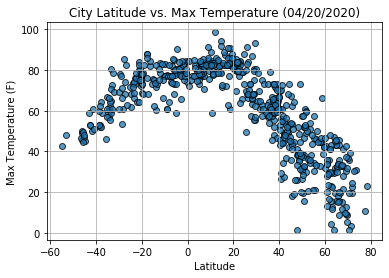

In [25]:
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], alpha=0.75, marker='o', edgecolors='black')
plt.title(f"City Latitude vs. Max Temperature ({weather_date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.savefig('latitude_vs_temp.png')
plt.show()

#### Latitude vs. Humidity Plot

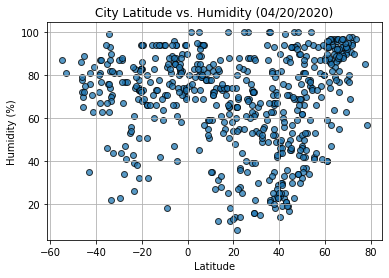

In [26]:
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], alpha=0.75, marker='o', edgecolors='black')
plt.title(f"City Latitude vs. Humidity ({weather_date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig('lat_vs_humidity.png')
plt.show()

#### Latitude vs. Cloudiness Plot

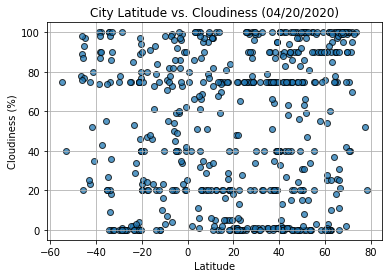

In [27]:
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], alpha=0.75, marker='o', edgecolors='black')
plt.title(f"City Latitude vs. Cloudiness ({weather_date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig('lat_vs_cloudiness.png')
plt.show()

#### Latitude vs. Wind Speed Plot

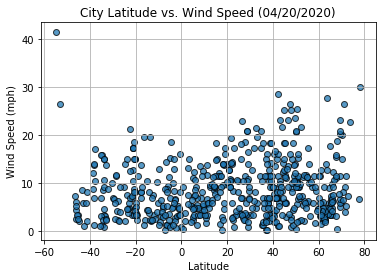

In [28]:
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], alpha=0.75, marker='o', edgecolors='black')
plt.title(f"City Latitude vs. Wind Speed ({weather_date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig('lat_vs_windspeed.png')
plt.show()

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots


In [ ]:
# Create Northern and Southern Hemisphere DataFrames


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression